In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/predictions030_time_cross_90.tsv', sep="\t")
print(df)

    project_ids  sample_ids genders  doses  target  prediction  \
0     SRP049440  SRR1636589  female      0       0           0   
1     SRP049440  SRR1636591  female      0       0           1   
2     SRP161461  SRR7817635    male      0       0           0   
3     SRP161461  SRR7817673    male      0       0           0   
4     SRP161461  SRR7817611    male      0       0           1   
..          ...         ...     ...    ...     ...         ...   
117   SRP049440  SRR1636674  female     30       1           0   
118   SRP075814  SRR3593575  female     30       1           1   
119   SRP161461  SRR7817690    male     30       1           1   
120   SRP090688  SRR4317657    male     30       1           1   
121   SRP161461  SRR7817655    male     30       1           1   

     confidence_class_0  confidence_class_1  
0              0.515165            0.484835  
1              0.471201            0.528799  
2              0.512841            0.487159  
3              0.559315

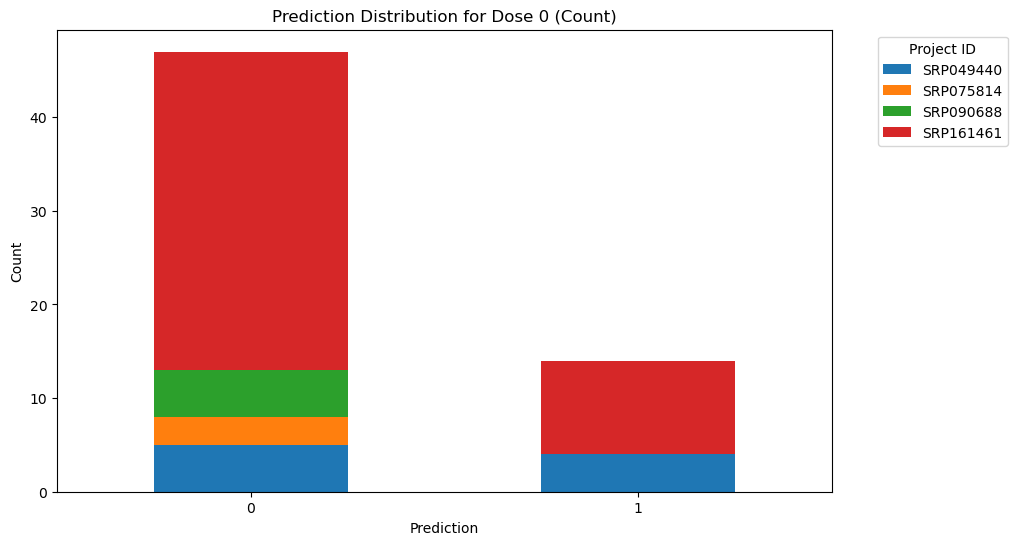

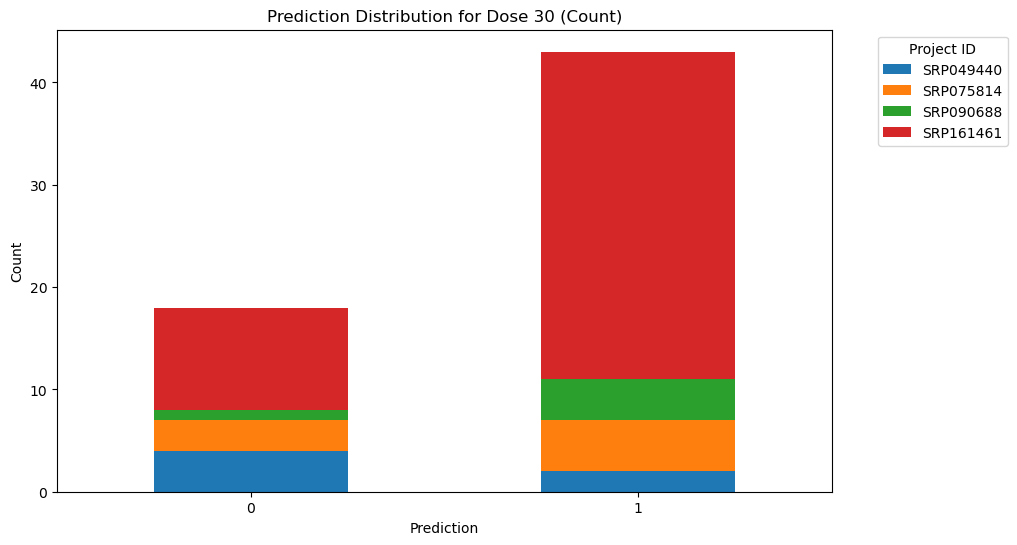

In [ ]:
for dose in df['doses'].unique():
    subset = df[df['doses'] == dose]
    prediction_counts = subset.groupby(['prediction', 'project_ids']).size().unstack(fill_value=0)
    
    ax = prediction_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.title(f'Prediction Distribution for Dose {dose} (Count)')
    plt.xlabel('Prediction')
    plt.ylabel('Count')
    plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.show()


In [4]:
ig_0 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_90.txt', header=None, sep="\t")
ig_1 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_90.txt', header=None, sep="\t")
edges = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/gtex/input/edgeLabels.csv', header=None, sep=" ")
result = pd.concat([ig_0, ig_1, edges], axis=1)
result.columns = ["ig_0", "ig_1", "start", "end"]
print(result)

          ig_0      ig_1          start            end
0     0.007546  0.007333  R-MMU-9613507  R-MMU-9613545
1     0.007390  0.007684  R-MMU-9613545  R-MMU-9613562
2     0.003458  0.003810  R-MMU-9613562  R-MMU-9613670
3     0.005573  0.005697  R-MMU-9639715  R-MMU-9640117
4     0.017674  0.020395  R-MMU-9641089  R-MMU-9641096
...        ...       ...            ...            ...
8551  0.013684  0.014451  R-MMU-8856808  R-MMU-8856813
8552  0.006026  0.000891  R-MMU-8868651  R-MMU-8868648
8553  0.011154  0.015605  R-MMU-8868648  R-MMU-8868661
8554  0.006537  0.005672  R-MMU-8868660  R-MMU-8868658
8555  0.007084  0.007807  R-MMU-8863721  R-MMU-8863723

[8556 rows x 4 columns]


In [5]:
import pandas as pd

sorted_by_ig0 = result.sort_values(by='ig_0', ascending=False)

sorted_by_ig1 = result.sort_values(by='ig_1', ascending=False)

sorted_by_ig0.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig0030_time_cross_90.csv', sep='\t', index=False)
sorted_by_ig1.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_90.csv', sep='\t',index=False)

